In [1]:
#对比下随机森林和决策树的效果在同一个数据集上  
# import the package we need 
%matplotlib inline 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import load_wine 

In [2]:
# see the data and target 
wine = load_wine() 
wine.data,wine.target 

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [4]:
# 建模 
#瞧一瞧
from sklearn.model_selection import train_test_split as tts 
Xtrain,Xtest,Ytrain,Ytest = tts(wine.data,wine.target,test_size = 0.3, random_state = 420) 

clf = DecisionTreeClassifier(random_state = 420).fit(Xtrain,Ytrain) 
rfc = RandomForestClassifier(random_state = 420).fit(Xtrain,Ytrain) 

score_c  = clf.score(Xtest,Ytest) 
score_r = rfc.score(Xtest,Ytest) 

print('single tree:{}'.format(score_c)) 
print('random forest:{}'.format(score_r)) 


single tree:0.9444444444444444
random forest:0.9444444444444444


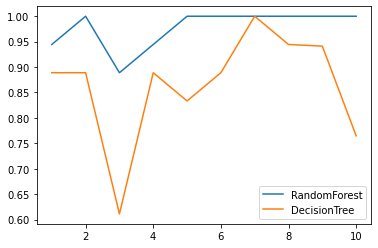

In [6]:
# 交叉验证下效果对比 
from sklearn.model_selection import cross_val_score 
import matplotlib.pyplot as plt 

rfc = RandomForestClassifier(n_estimators =25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10) 

clf = DecisionTreeClassifier() 
clf_s = cross_val_score(clf,wine.data,wine.target,cv = 10) 

plt.plot(range(1,11),rfc_s,label = 'RandomForest') 
plt.plot(range(1,11),clf_s,label = 'DecisionTree') 
plt.legend() 
plt.show() 

It shows that RandomForest is better than DecisionTree in cross validation 

the average score of the 10 fold cross validation for the model RandomForestClassifier(n_estimators=25)  is 0.9555555555555555


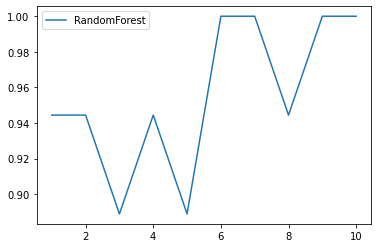

the average score of the 10 fold cross validation for the model DecisionTreeClassifier()  is 0.8761437908496731


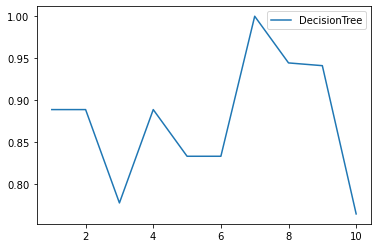

In [8]:
## what if we modify our code --- cross validation performance compare 
# do not care about other parameters in random forest since we don't know now 

label = 'RandomForest'
for model in [RandomForestClassifier(n_estimators = 25),DecisionTreeClassifier()]: 
    score = cross_val_score(model,wine.data,wine.target,cv = 10) 
    print('the average score of the 10 fold cross validation for the model {}  is {}'.format(model,score.mean())) 
    
    plt.plot(range(1,11),score,label = label) 
    plt.legend() 
    plt.show() 
    label = 'DecisionTree' 


0.9888888888888889 23


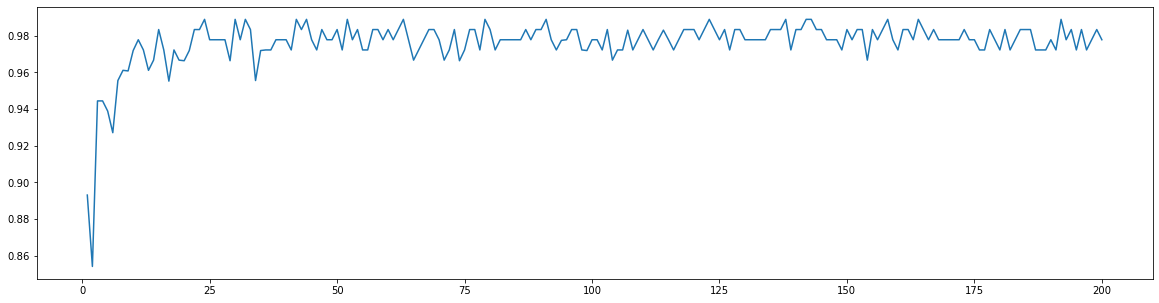

In [10]:
# n_estimators learning curve 
score_ = [] 
for i in range(200): 
    rfc = RandomForestClassifier(n_estimators = i+1,n_jobs = -1) 
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()  
    score_.append(rfc_s) 
    
print(max(score_),score_.index(max(score_))) 
plt.figure(figsize = (20,5)) 
plt.plot(range(1,201),score_) 
plt.show() 

In [12]:
# bootstrap - 默认 = True， 控制抽样技术的参数 ，采用有放回的随机抽样技术 
# oob_score 没被采集到的数据 可用作测试集， 
# 使用随机森林时，可不分训练集和测试集 

rfc = RandomForestClassifier(n_estimators = 25
                             ,oob_score=True).fit(wine.data,wine.target) 
# oob_score 
rfc.oob_score_  

0.9662921348314607

In [17]:
import warnings
warnings.filterwarnings('ignore') 

In [18]:
# 回归类问题 
# randomforestregressor  

from sklearn.datasets import load_boston 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestRegressor 

boston =load_boston() 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
cross_val_score(regressor,boston.data,boston.target,cv = 10, 
                scoring = 'neg_mean_squared_error').mean()  

-21.765896304705873

In [34]:
#乳腺癌数据集实例 
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [37]:
data = load_breast_cancer() 
data,data.data.shape,data.target 

({'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
          1.189e-01],
         [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
          8.902e-02],
         [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
          8.758e-02],
         ...,
         [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
          7.820e-02],
         [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
          1.240e-01],
         [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
          7.039e-02]]),
  'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
         1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
         1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
         1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 

In [38]:
# 进行一次简单建模 
rfc = RandomForestClassifier(n_estimators = 100
                             ,random_state = 90) 
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean() 
score_pre 

0.9648809523809524

the maximum of the socre is 0.9631265664160402, and the index of the score is 71


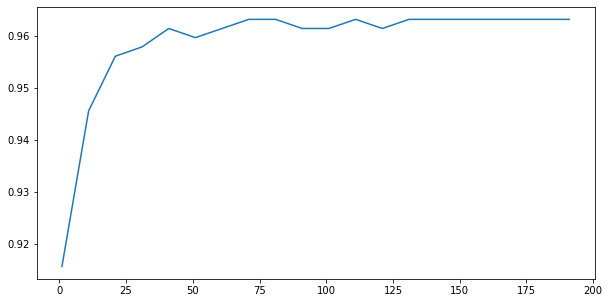

In [48]:
# 学习曲线 n_estimators 
score1 = [] 
for i in range(0,200,10): 
    rfc = RandomForestClassifier(n_estimators = i+1
                                 ,n_jobs = -1
                                 ,random_state = 90) 
    score = cross_val_score(rfc
                            ,data.data
                            ,data.target
                            ,cv=10).mean() 
    score1.append(score)  

print('the maximum of the socre is {}, and the index of the score is {}'.format(max(score1),(score1.index(max(score1))*10+1)))
plt.figure(figsize = [10,5]) 
plt.plot(range(1,201,10),score1,label = 'n_estimators learning curve')
plt.show() 

In [49]:
# seems the score is not better than start 
# do not worry 
# let's try other parameters 
# use grid search cv 
# 调整max_depth 
param_grid = {'max_depth':np.arange(1,20,1)} 
rfc = RandomForestClassifier(n_estimators = 71
                             ,random_state = 90) 
GS = GridSearchCV(rfc,param_grid,cv =10) 
GS.fit(data.data,data.target) 
GS.best_params_, GS.best_score_ 

({'max_depth': 8}, 0.9666353383458647)

In [50]:
# when we use n_estimators = 71, and max_depth = 8, the accuray of the model is better. 
# Lets'try other parameters. max_feature  
param_grid = {'max_features':np.arange(5,30,1)} 
rfc = RandomForestClassifier(n_estimators = 71
                             ,random_state = 90
                             ,max_depth = 8 ) 
GS  = GridSearchCV(rfc,param_grid,cv = 10) 
GS.fit(data.data,data.target) 
GS.best_params_,GS.best_score_ 



({'max_features': 22}, 0.968421052631579)

In [55]:
#It seems we can still improve the model 
# so let's use grid search directly  ---- too slowly  
# we should tune parameters separately 
# tune min_samples_leaf 
param_grid = {'min_samples_leaf':np.arange(1,1+10,1)} 

rfc = RandomForestClassifier(n_estimators = 71
                             ,random_state = 90
                             ,max_depth = 8
                             ,max_features = 22
                            )
GS = GridSearchCV(rfc,param_grid,cv=10) 
GS.fit(data.data,data.target)
GS.best_params_,GS.best_score_ 




({'min_samples_leaf': 1}, 0.968421052631579)

In [57]:
# it seems that the accuarcy of the model not change
# it shows the model reaches its limit 
# let us try tune min_samples_split 
param_grid = {'min_samples_split':np.arange(2,2+20,1)} 

rfc = RandomForestClassifier(n_estimators = 71
                             ,random_state = 90
                             ,max_depth = 8
                             ,max_features = 22
                             ,min_samples_leaf = 1
                            ) 
GS = GridSearchCV(rfc,param_grid,cv=10) 
GS.fit(data.data,data.target)
GS.best_params_,GS.best_score_ 

({'min_samples_split': 2}, 0.968421052631579)

In [58]:
#model accuracy not change 
#so actually we do not need tune min_sample_split & min_sample_leaf 
# how about we try last parameter criterion 
param_grid = {'criterion':['gini','entropy']} 

rfc = RandomForestClassifier(n_estimators = 71
                             ,random_state = 90
                             ,max_depth = 8
                             ,max_features = 22
                             ,min_samples_leaf = 1
                             ,min_samples_split = 2 
                            ) 
GS = GridSearchCV(rfc,param_grid,cv=10) 
GS.fit(data.data,data.target)
GS.best_params_,GS.best_score_ 

({'criterion': 'gini'}, 0.968421052631579)